In [1]:
import joblib
import pandas as pd

In [2]:
df = pd.read_csv("output.csv")
y = df['Target variable ( 1: Defaulters / 0: Non-Defaulters)']
X = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan']]

In [3]:
filename = 'XGBoost_custom_scorer_current.sav'
model = joblib.load(filename)

D:\Users\9csic\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.23.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [4]:
from sklearn.preprocessing import MinMaxScaler

#setup predictions from model
X_scaler = MinMaxScaler().fit(X.copy())

X_overall_scaled = X_scaler.transform(X.copy())

#compare with the test data!
predictions = model.predict(X_overall_scaled)

In [5]:
model.score(X_overall_scaled, y)

4232

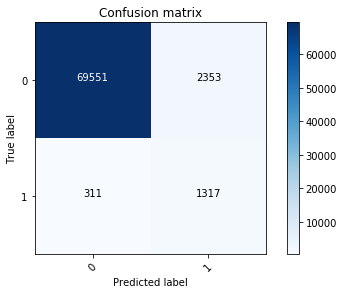

In [6]:
from confusion_matrix_plot import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

thresh = 0.08
predictions [predictions > thresh] = 1
predictions [predictions <= thresh] = 0
cm = confusion_matrix(y, predictions)
plot_confusion_matrix(cm, ['0', '1'], )

# Equivalent Loans Generated (basis for comparing overall model scores)

The following section describes a value that represents the approximate "equivalent loans" that would be given and not default if this model is used to prevent all personal loan offers to the identified potential defaulter group (assuming all offers would be accepted, so this is a maximum value that may not be reproduced in practice)
This value represents a good point of comparison to the overall number of loans in the dataset of 73532
As long as this value is positive, the model likely has some financial worth to the company, even if it is not necessarily optimal
This number can be used as a metric to compare the results of different saved models after loading them into this notebook

# XGBoost Model III Data

In [19]:
# XGBoost_model_III Data
num_loans1 = cm[1,1]*2.5 - cm[0,1]
num_loans2 = cm[1,1]*5 - cm[0,1]

In [20]:
def get_savings(loans):
    #get the dollar amount of total savings
    #8164.259838698005 is the profit in rupees per loan
    #0.014 is the exchange rate for rupees to dollars
    return loans*8164.259838698005
approx_savings1 = get_savings(num_loans1)
approx_savings2 = get_savings(num_loans2)
print(approx_savings1)
print(approx_savings2)

7670322.118456776
34551147.63736996


In [9]:
cm[0,1]

2353

In [21]:
num_loansA = 645*2.5-3055
num_loansB = 645*5-3055

In [23]:
def get_savings2(loans):
    #get the dollar amount of total savings
    #8164.259838698005 is the profit in rupees per loan
    #0.014 is the exchange rate for rupees to dollars
    return loans*8164.259838698005
approx_savingsA = get_savings2(num_loansA)
approx_savingsB = get_savings2(num_loansB)
print(approx_savingsA)
print(approx_savingsB)
print(approx_savingsB*.014)

-11776944.817321872
1387924.172578661
19430.938416101253


In [10]:
data_df = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan','Target variable ( 1: Defaulters / 0: Non-Defaulters)']]

In [12]:
grouped_df = data_df.groupby(['Target variable ( 1: Defaulters / 0: Non-Defaulters)'])
grouped_df = grouped_df.mean()
grouped_df.round(2)

,EMI,Loan Amount,Maximum amount sanctioned for any Two wheeler loan,Age at which customer has taken the loan,Rate of Interest,Number of times 30 days past due in last 6 months,Maximum MOB (Month of business with TVS Credit),Number of times 60 days past due in last 6 months,Number of loans,Maximum amount sanctioned in the Live loans,Number of times 90 days past due in last 3 months,Tenure,Number of times bounced while repaying the loan
Target variable ( 1: Defaulters / 0: Non-Defaulters),,,,,,,,,,,,,
0,2339.41,40182.51,41362.12,36.89,11.39,1.15,17.45,0.87,4.19,96173.61,0.37,21.41,0.69
1,2342.72,41359.86,43003.46,34.15,11.66,5.41,18.02,4.28,3.98,107196.51,1.76,22.11,1.15


# 30 Day Past Due Data

In [13]:
# Number of times 30 days past due in last 3 months data
# 2.21% default rate for all loans
# 0.96% default rate if 0-1 times, 62727 samples
# 9.46% default rate if 2+ times, 10807 samples
data30_df = data_df
labels_30 = ['0-1 times 30 days past due in last 6 months','2+ times 30 days past due in last 6 months']
bins_30 = [-1,2,1000]

data30_df['30 day groups'] = pd.cut(data30_df['Number of times 30 days past due in last 6 months'],bins=bins_30,labels=labels_30)

data30_df = data30_df[['30 day groups','Target variable ( 1: Defaulters / 0: Non-Defaulters)']]
data30_df = data30_df.rename(columns={"Target variable ( 1: Defaulters / 0: Non-Defaulters)":'Percent Chance of Defaulting'})
data30_df.groupby(['30 day groups']).mean() * 100

,Percent Chance of Defaulting
30 day groups,
0-1 times 30 days past due in last 6 months,0.964512
2+ times 30 days past due in last 6 months,9.466963


In [14]:
data_df = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan','Target variable ( 1: Defaulters / 0: Non-Defaulters)']]

# 60 Day Past Due Data

In [15]:
# Number of times 60 days past due in last 3 months data
# 2.21% default rate for all loans
# 1.1% default rate if 0-1 times, 63340 samples
# 9.07% default rate if 2+ times, 10194 samples
data60_df = data_df
labels_60 = ['0-1 times 60 days past due in last 6 months','2+ times 60 days past due in last 6 months']
bins_60 = [-1,1.1,1000]

data60_df['60 day groups'] = pd.cut(data60_df['Number of times 60 days past due in last 6 months'],bins=bins_60,labels=labels_60)

data60_df = data60_df[['60 day groups','Target variable ( 1: Defaulters / 0: Non-Defaulters)']]
data60_df = data60_df.rename(columns={"Target variable ( 1: Defaulters / 0: Non-Defaulters)":'Percent Chance of Defaulting'})
data60_df.groupby(['60 day groups']).mean() * 100

D:\Users\9csic\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Percent Chance of Defaulting
60 day groups,
0-1 times 60 days past due in last 6 months,1.109901
2+ times 60 days past due in last 6 months,9.074855


In [16]:
data_df = df[['EMI', 'Loan Amount', 'Maximum amount sanctioned for any Two wheeler loan', 
                       'Age at which customer has taken the loan', 'Rate of Interest', 
                        'Number of times 30 days past due in last 6 months', 'Maximum MOB (Month of business with TVS Credit)',
                       'Number of times 60 days past due in last 6 months', 'Number of loans', 
                        'Maximum amount sanctioned in the Live loans', 'Number of times 90 days past due in last 3 months', 
                       'Tenure', 'Number of times bounced while repaying the loan','Target variable ( 1: Defaulters / 0: Non-Defaulters)']]

# 90 Day Past Due Data

In [17]:
# Number of times 90 days past due in last 3 months data
# 2.21% default rate for all loans
# 1.65% default rate if 0-2 times, 68691 samples
# 10.12% default rate if 3+ times, 4843 samples
data90_df = data_df
labels_90 = ['0-1 times 90 days past due in last 6 months','3+ times 90 days past due in last 3 months']
bins_90 = [-1,2.1,1000]

data90_df['90 day groups'] = pd.cut(data90_df['Number of times 90 days past due in last 3 months'],bins=bins_90,labels=labels_90)

data90_df = data90_df[['90 day groups','Target variable ( 1: Defaulters / 0: Non-Defaulters)']]
data90_df = data90_df.rename(columns={"Target variable ( 1: Defaulters / 0: Non-Defaulters)":'Percent Chance of Defaulting'})
data90_df.groupby(['90 day groups']).mean() * 100

D:\Users\9csic\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


,Percent Chance of Defaulting
90 day groups,
0-1 times 90 days past due in last 6 months,1.656719
3+ times 90 days past due in last 3 months,10.119785
